In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/svo_triples_manual_annotations.csv')

df.head()

,Character 1,Character Label 1,Dependency Relation 1,Verb,Dependency Relation 2,Character Label 2,Character 2
0,women,Hero,subject,play,advcl,Hero,Security Council resolution 1325 (2000)
1,Iceland,Hero,subject,has supported,object,Victim,women
2,The Icelandic Government,Hero,subject,has been financing,object,Hero,a gender expert at the United Nations Develop...
3,We,Hero,subject,support,object,Hero,Special Representative Patten
4,we,Hero,subject,are turning,oblique,Hero,partners


In [3]:
women_svos = df[
    df["Character 1"].str.contains("women", case=False, na=False) |
    df["Character 2"].str.contains("women", case=False, na=False)
]
women_svos.to_csv('../../data/svo_triples_women_manual_annotations.csv', index=False)
women_svos.head(7)

,Character 1,Character Label 1,Dependency Relation 1,Verb,Dependency Relation 2,Character Label 2,Character 2
0,women,Hero,subject,play,advcl,Hero,Security Council resolution 1325 (2000)
1,Iceland,Hero,subject,has supported,object,Victim,women
2,The Icelandic Government,Hero,subject,has been financing,object,Hero,a gender expert at the United Nations Develop...
10,Germany,Hero,subject,supports,object,Hero,the Ministry of Women's and Veteran's Affairs
12,Women,Hero,subject,serve,oblique,Hero,their male counterparts
13,we,Villain,subject,excluding,object,Victim,women
14,women,Hero,subject,have begun,advcl,Victim,they


#### initial stats
not accurate since some entities are not actually referring to women (e.g., "all those parties that perpetuate acts of  violence and abuse against women and children")

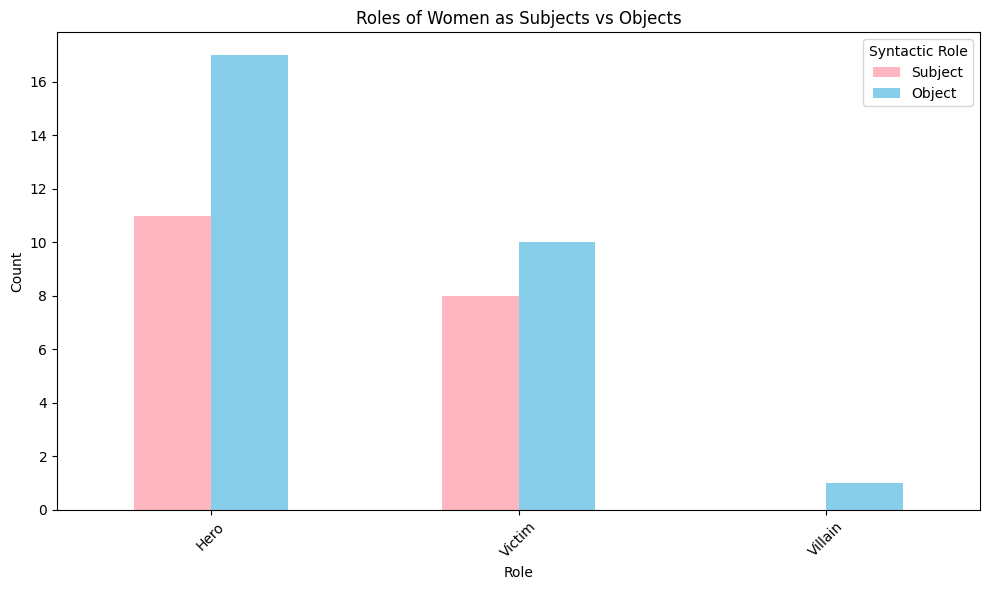

In [ ]:
# separating women as subjects and as (syntactic!!) objects
women_as_subj = df[(df["Character 1"].str.contains("women")) & (df["Dependency Relation 1"] == "subject")]
women_as_obj = df[(df["Character 2"].str.contains("women")) & (df["Dependency Relation 2"] == "object")]

# role counts
role_stats_subj = women_as_subj["Character Label 1"].value_counts()
role_stats_obj = women_as_obj["Character Label 2"].value_counts()

role_stats = pd.DataFrame({
    'Subject': role_stats_subj,
    'Object': role_stats_obj
}).fillna(0)

# plot roles
fig, ax = plt.subplots(figsize=(10, 6))
role_stats.plot(kind='bar', ax=ax, color=['lightpink', 'skyblue'])
ax.set_title('Roles of Women as Subjects vs Objects')
ax.set_ylabel('Count')
ax.set_xlabel('Role')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='Syntactic Role')
plt.tight_layout()
plt.show()

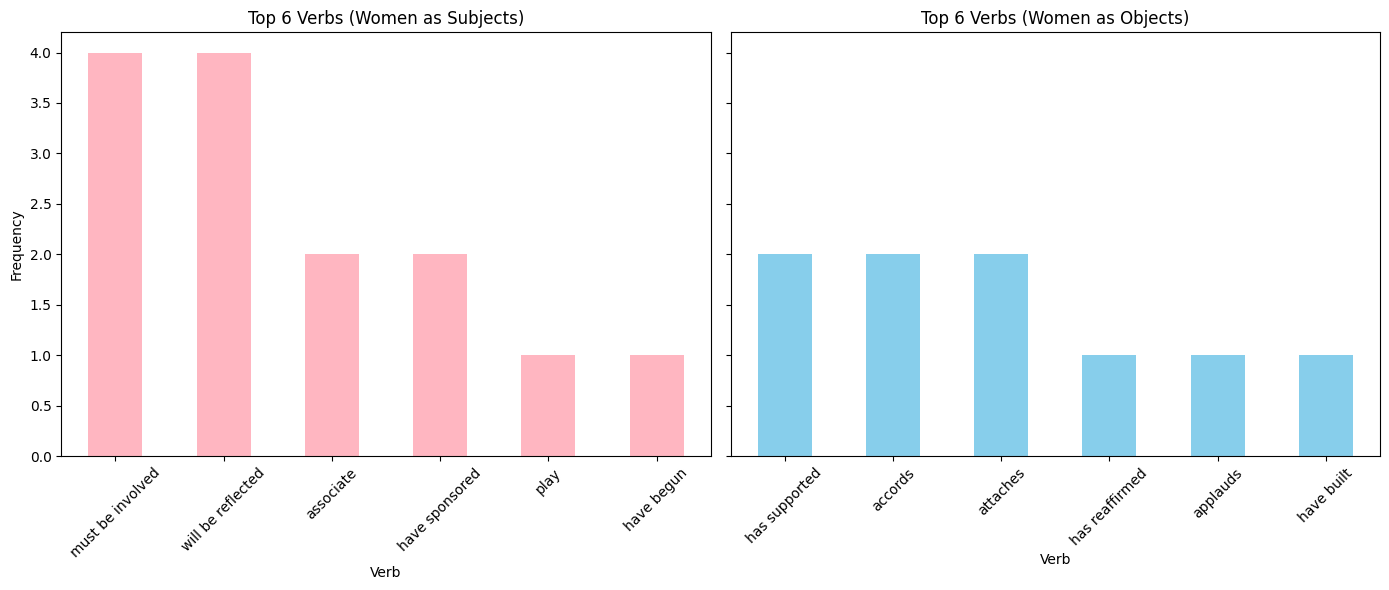

In [21]:
common_verbs_subj = women_as_subj["Verb"].value_counts().head(6)
common_verbs_obj = women_as_obj["Verb"].value_counts().head(6)

# Plot top verbs (independent order, no overflow)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

common_verbs_subj.plot(kind='bar', ax=axes[0], color='lightpink')
axes[0].set_title('Top 6 Verbs (Women as Subjects)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Verb')
axes[0].tick_params(axis='x', labelrotation=45)

common_verbs_obj.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Top 6 Verbs (Women as Objects)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Verb')
axes[1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()